In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [18]:
print(x_train.shape)
print(x_test.shape)

# 卷積針對3維，如果資料只有2維無法直接用，需要轉換一下
# mnist  ->  x_train.reshape(-1, 28, 28, 1)
# 直接在2維後加上1擴展成3維

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [19]:
# image cache 增加日後的擴充性，所以用list
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [0]:
names= [
       "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck"
        ]

ans: truck


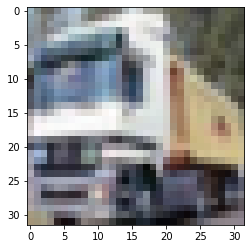

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
idx=1
print("ans:", names[y_train[idx][0]])
plt.imshow(x_train[idx])
# x_train[0]

In [22]:
# kernel_size 習慣用3x3，剩下用深度去擴展
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()

# 一個filter(3*3*3)*64(個)+64(bias)=1792
model.add(Conv2D(64,
                 (3,3),
                 padding="same",
                 activation="relu",
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

# 一個filter(3*3*64)*128(個)+128(bias)=73856
model.add(Conv2D(128,
                 (3,3),
                 padding="same",
                 activation="relu"))
model.add(MaxPooling2D())

# 一個filter(3*3*128)*256(個)+256(bias)=73856
model.add(Conv2D(256,
                 (3,3),
                 padding="same",
                 activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [0]:
# 交給 tensorflow 去做 one-hot encoding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [25]:
# batch_size: 問多少筆資料進行一次梯度下降(平均)
# epochs: 整份資料要看幾次
# validation_sqlit: train_test_split驗證模型到底好不好
# verbose: log level(0:沒有  1:最多  2:適中)
# 270: 54000(train) / 200
# patience: 連續上升次數
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
stop_callback = EarlyStopping(patience=3, restore_best_weights=True)
save_callback = ModelCheckpoint("fashion.h5", save_best_only=True)
model.fit(x_train_norm, 
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          callbacks=[stop_callback, save_callback],
          verbose=2)

Epoch 1/100
225/225 - 8s - loss: 1.6673 - accuracy: 0.3904 - val_loss: 1.3101 - val_accuracy: 0.5238
Epoch 2/100
225/225 - 7s - loss: 1.2624 - accuracy: 0.5501 - val_loss: 1.0797 - val_accuracy: 0.6248
Epoch 3/100
225/225 - 8s - loss: 1.0581 - accuracy: 0.6275 - val_loss: 0.9315 - val_accuracy: 0.6778
Epoch 4/100
225/225 - 7s - loss: 0.9240 - accuracy: 0.6782 - val_loss: 0.8457 - val_accuracy: 0.7114
Epoch 5/100
225/225 - 7s - loss: 0.8308 - accuracy: 0.7115 - val_loss: 0.7933 - val_accuracy: 0.7264
Epoch 6/100
225/225 - 7s - loss: 0.7435 - accuracy: 0.7430 - val_loss: 0.7503 - val_accuracy: 0.7434
Epoch 7/100
225/225 - 7s - loss: 0.6704 - accuracy: 0.7655 - val_loss: 0.7463 - val_accuracy: 0.7474
Epoch 8/100
225/225 - 8s - loss: 0.6063 - accuracy: 0.7883 - val_loss: 0.6810 - val_accuracy: 0.7712
Epoch 9/100
225/225 - 7s - loss: 0.5470 - accuracy: 0.8092 - val_loss: 0.6779 - val_accuracy: 0.7710
Epoch 10/100
225/225 - 7s - loss: 0.4860 - accuracy: 0.8286 - val_loss: 0.6672 - val_accura

In [26]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6959 - accuracy: 0.7665


[0.6958839297294617, 0.7664999961853027]

In [27]:
# predict: 機率  predict_classes: 類別
pre = model.predict_classes(x_test_norm)
print(pre.shape)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
(10000,)


array([3, 8, 8, ..., 5, 1, 7])

In [28]:
print(y_test.shape)
y_test_1d = y_test.reshape(-1)
print(y_test_1d.shape)
print(y_test_1d)

(10000, 1)
(10000,)
[3 8 8 ... 5 1 7]


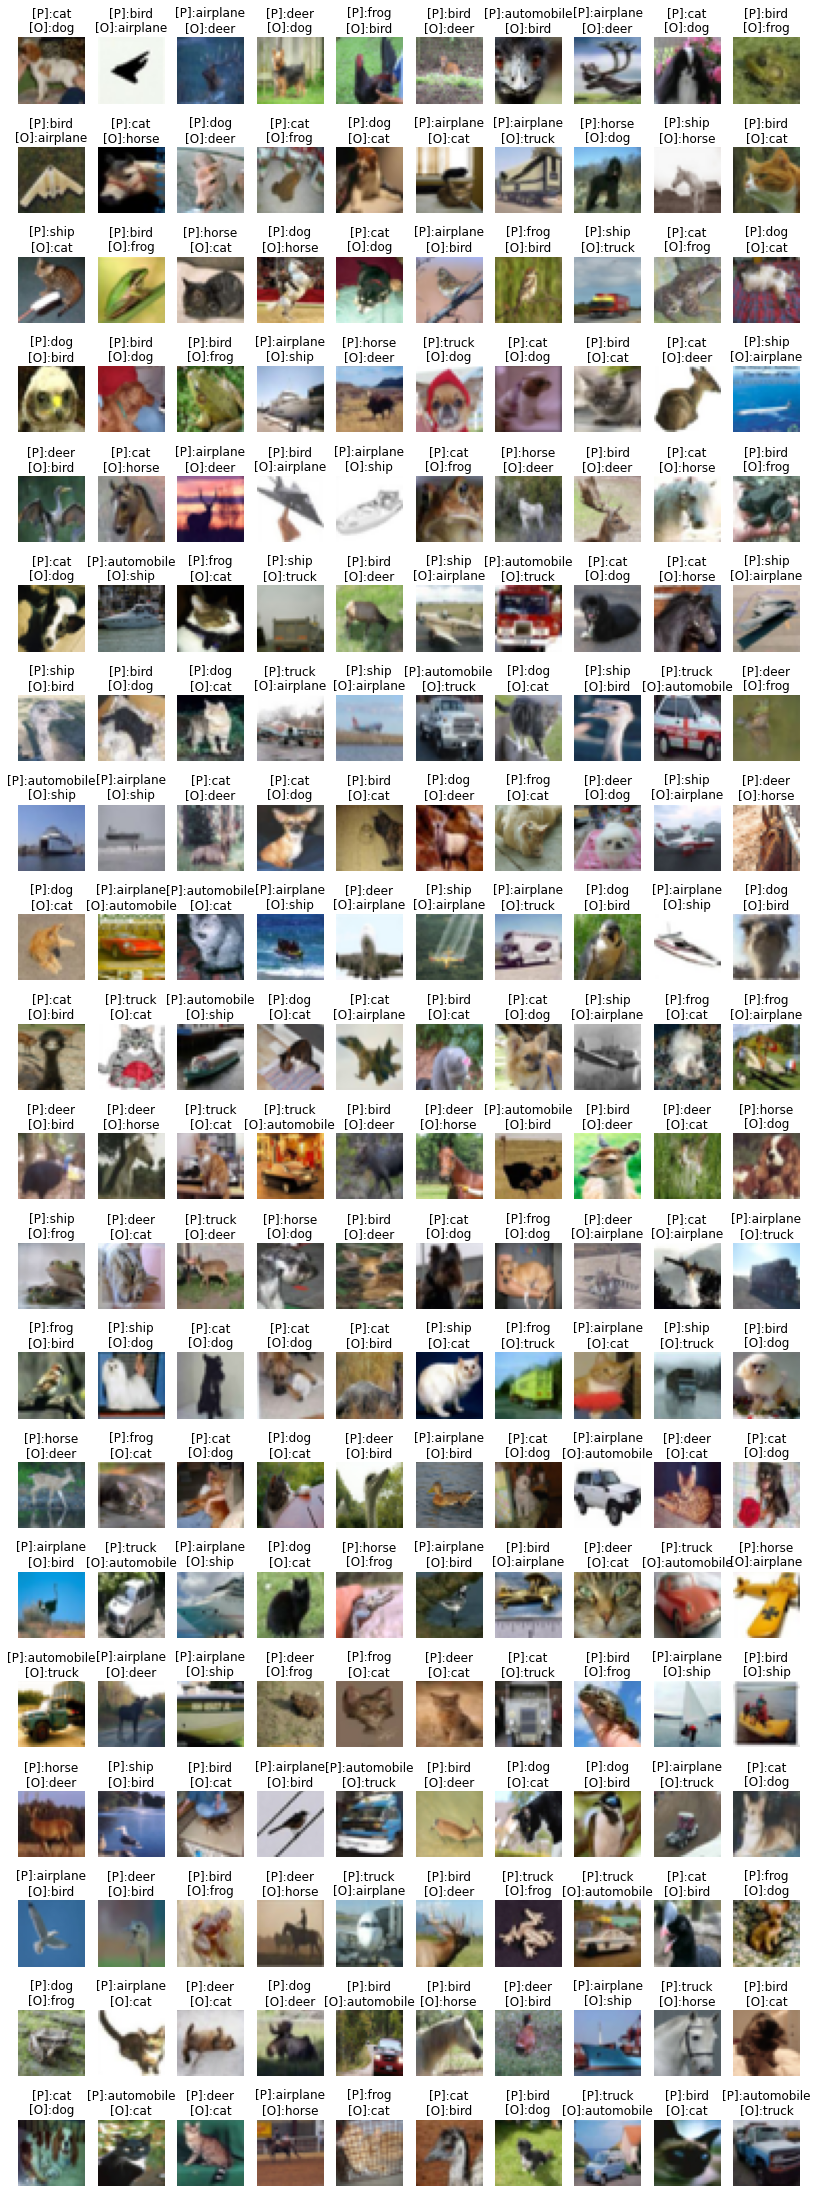

In [30]:
import numpy as np
# [:200]: 太多錯, 我只取前兩百個
idx = np.nonzero(pre != y_test_1d)[0][:200]
false_pre_img = x_test[idx]
false_pre_label = y_test_1d[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_pre_img):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(names[false_pre_predict[i]],
                                names[false_pre_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

檔名32.jpg
正確答案應該是: bird


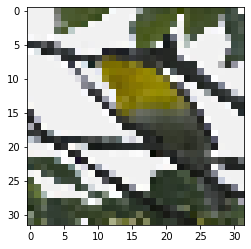

In [31]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名")
img_raw = load_img(f, target_size=(32, 32)).convert("RGB")
img = np.array(img_raw).reshape(1, 32, 32, 3) / 255
answer = model.predict_classes(img)[0]
print("正確答案應該是:", names[answer])
plt.imshow(img_raw)